<p style="background-color:mediumseagreen;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:60px 20px;"><b>XGBoost Classification</b></p>

**About Dataset**

Machine Learning Model to Predict Clicks on Ads

* **Daily Time Spent on Site**: consumer time on site in minutes
* **Age**: cutomer age in years
* **Area Income**: Avg. Income of geographical area of consumer
* **Daily Internet Usage**: Avg. minutes a day consumer is on the internet
* **Ad Topic Line**: Headline of the advertisement
* **City**: City of consumer
* **Male**: Whether or not consumer was male
* **Country**: Country of consumer
* **Timestamp**: Time at which consumer clicked on Ad or closed window
* **Clicked on Ad**: 0 or 1 indicated clicking on Ad

# <font color='mediumseagreen'> <b>Importing Libraries</b><font color='black'>  

In [80]:
# !pip install xgboost

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from xgboost import XGBClassifier

plt.rcParams["figure.figsize"] = (10,6)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# <font color='mediumseagreen'> <b>Loading The Dataset</b><font color='black'>

In [83]:
df = pd.read_csv("advertising2.csv")
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [84]:
df.sample(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
658,82.95,39,69805.70,201.29,Customer-focused impactful success,Karenmouth,0,Lao People's Democratic Republic,2016-04-05 08:18:45,0
782,80.46,29,56909.30,230.78,Mandatory coherent groupware,Carterton,0,India,2016-06-04 09:13:29,0
335,38.94,41,57587.00,142.67,Optional mission-critical functionalities,Lewismouth,1,Falkland Islands (Malvinas),2016-07-15 09:08:42,1
610,32.91,37,51691.55,181.02,Future-proofed fresh-thinking conglomeration,Elizabethstad,0,South Africa,2016-07-17 14:26:04,1
569,71.28,37,67307.43,246.72,Distributed scalable orchestration,Dustinchester,1,Guyana,2016-04-10 16:08:09,0
196,44.78,45,63363.04,137.24,Extended context-sensitive monitoring,West Casey,1,Suriname,2016-07-09 11:04:54,1
95,72.84,26,52968.22,238.63,Progressive empowering alliance,Wongland,0,Albania,2016-07-08 21:18:32,0
137,38.52,38,42581.23,137.28,Customer-focused 24/7 concept,Lesliebury,1,Saint Vincent and the Grenadines,2016-03-27 23:59:06,1
388,68.10,40,74903.41,227.73,Reactive composite project,Thomasstad,1,Honduras,2016-02-05 16:50:58,0
109,74.02,32,72272.90,210.54,Operative system-worthy protocol,Johnstad,0,Micronesia,2016-03-09 14:57:11,0


# <font color='mediumseagreen'> <b>Understanding Data & EDA</b><font color='black'>

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [87]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,1000.0,65.00020,15.853615,32.60,51.3600,68.215,78.5475,91.43
Age,1000.0,36.00900,8.785562,19.00,29.0000,35.000,42.0000,61.00
Area Income,1000.0,55000.00008,13414.634022,13996.50,47031.8025,57012.300,65470.6350,79484.80
Daily Internet Usage,1000.0,180.00010,43.902339,104.78,138.8300,183.130,218.7925,269.96
Male,1000.0,0.48100,0.499889,0.00,0.0000,0.000,1.0000,1.00
Clicked on Ad,1000.0,0.50000,0.500250,0.00,0.0000,0.500,1.0000,1.00


In [88]:
df["Clicked on Ad"].value_counts()

Clicked on Ad
0    500
1    500
Name: count, dtype: int64

In [89]:
def unique_values(df, columns):
    """Prints unique values and their counts for specific columns in the DataFrame."""

    for column_name in columns:
        print(f"Column: {column_name}\n{'-'*30}")
        unique_vals = df[column_name].unique()
        value_counts = df[column_name].value_counts()
        print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
        print(f"Value Counts:\n{value_counts}\n{'='*40}\n")

In [90]:
cat_features = df.select_dtypes(include="object").columns
cat_features

Index(['Ad Topic Line', 'City', 'Country', 'Timestamp'], dtype='object')

In [91]:
unique_values(df, cat_features)

Column: Ad Topic Line
------------------------------
Unique Values (1000): ['Cloned 5thgeneration orchestration' 'Monitored national standardization'
 'Organic bottom-line service-desk'
 'Triple-buffered reciprocal time-frame' 'Robust logistical utilization'
 'Sharable client-driven software' 'Enhanced dedicated support'
 'Reactive local challenge' 'Configurable coherent function'
 'Mandatory homogeneous architecture' 'Centralized neutral neural-net'
 'Team-oriented grid-enabled Local Area Network'
 'Centralized content-based focus group'
 'Synergistic fresh-thinking array' 'Grass-roots coherent extranet'
 'Persistent demand-driven interface' 'Customizable multi-tasking website'
 'Intuitive dynamic attitude'
 'Grass-roots solution-oriented conglomeration'
 'Advanced 24/7 productivity' 'Object-based reciprocal knowledgebase'
 'Streamlined non-volatile analyzer'
 'Mandatory disintermediate utilization'
 'Future-proofed methodical protocol' 'Exclusive neutral parallelism'
 'Public-key for

In [92]:
for feature in df.columns:
    if df[feature].dtype=="object":
        print(feature, df[feature].nunique())
        
        
# The unique counts of categorical features are being identified.
# Categorical features with a high number of unique observations will be dropped.
# Tree-based models tend to assign excessive importance to features with many unique categories.
# Additionally, features with few unique observations fail to provide meaningful learning to the model.

Ad Topic Line 1000
City 969
Country 237
Timestamp 1000


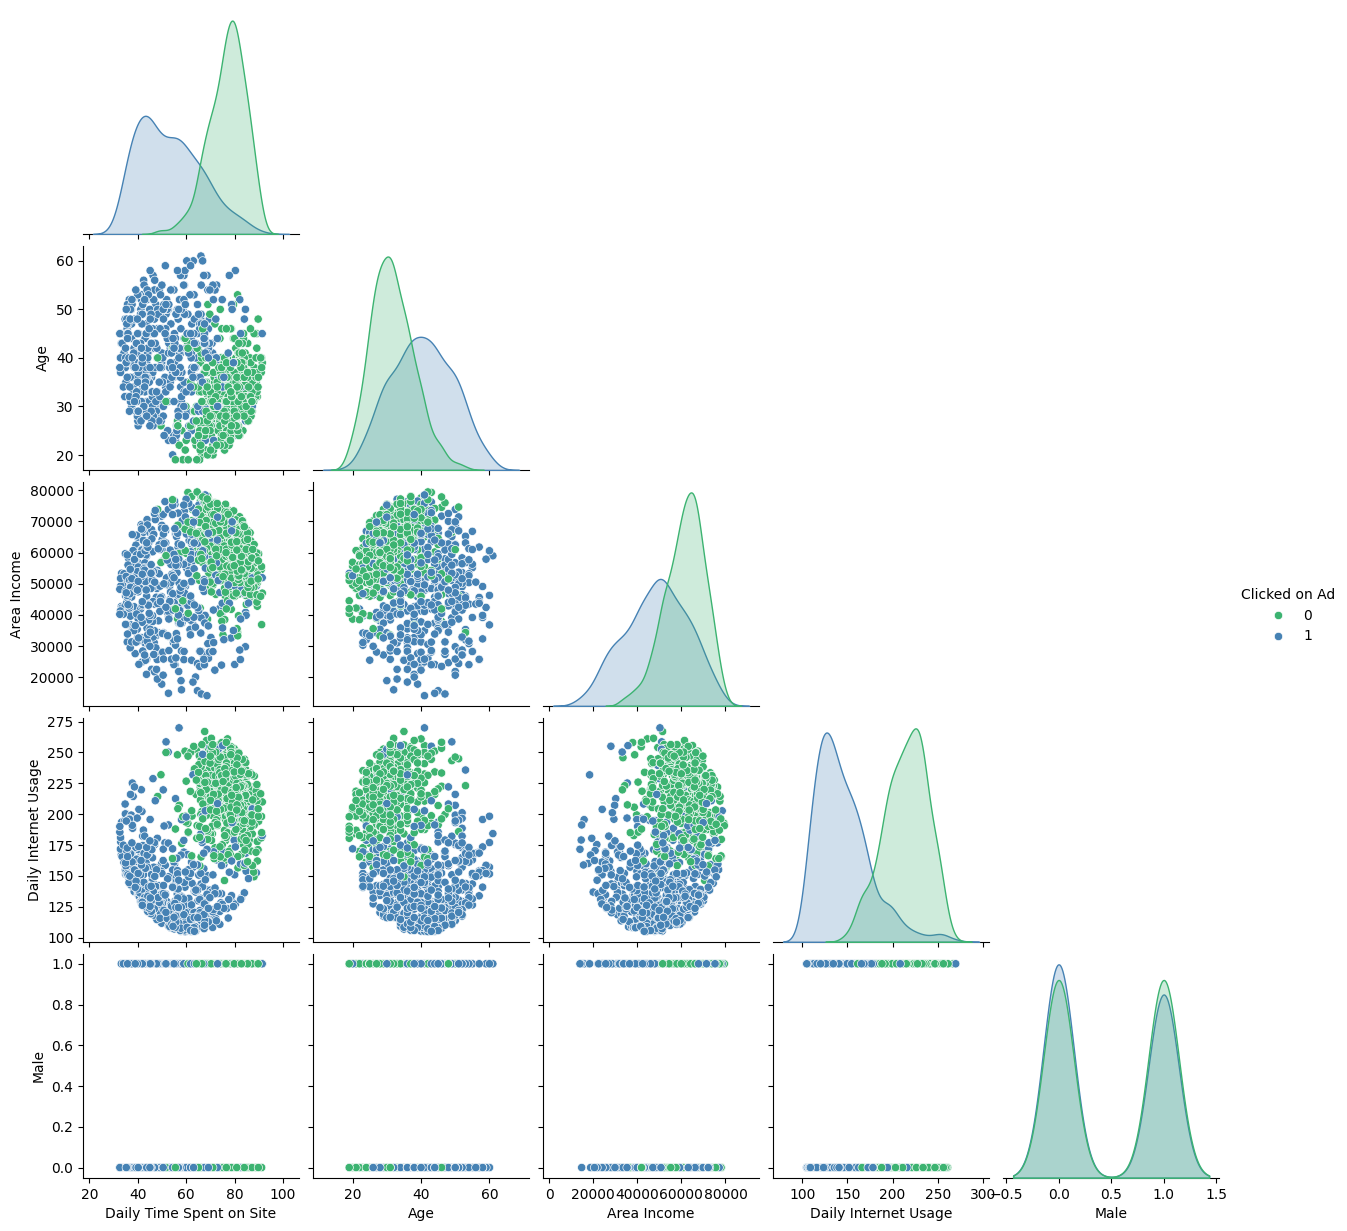

In [93]:
sns.pairplot(df, hue="Clicked on Ad", corner=True, palette=["mediumseagreen", "steelblue"]);

# <font color='mediumseagreen'> <b>Modeling</b><font color='black'>

## <font color='limegreen'> <b>Train | Test Split</b><font color='black'>

In [96]:
X = df[["Daily Time Spent on Site", "Age", "Area Income", "Daily Internet Usage", "Male"]]
y = df["Clicked on Ad"]

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## <font color='limegreen'> <b>XGBoost: Extreme Gradient Boosting Modeling</b><font color='black'>

XGBoost (eXtreme Gradient Boosting) is a scalable and optimized version of the Gradient Boosting algorithm.

XGBoost is a powerful machine learning algorithm commonly used in both regression and classification problems.

Due to its performance and speed, it is a preferred method in many machine learning and data science competitions.

**Key Features of XGBoost**

- **Gradient Boosting:** XGBoost uses Decision Trees (DT) in the background to predict the most powerful trees. It is based on the Gradient Boosting logic and uses a logistic regression-like logic in classification.

- **Speed and Performance:** XGBoost supports parallel processing and the simultaneous construction of tree branches, which makes it extremely fast and efficient when working with large datasets.

- **Flexibility:** XGBoost allows users to define custom optimization objectives and evaluation metrics. This increases its adaptability for different types of prediction problems.

- **Regularization:** XGBoost includes both L1 (lasso) and L2 (ridge) regularization to control the model's complexity and prevent overfitting.

- **Handling Missing Values:** XGBoost can automatically handle missing values and learn the best branching for them.

- **Cross Validation:** XGBoost can perform cross-validation internally, allowing direct evaluation of the model's performance at each iteration. Therefore, XGBoost outputs can be thought of as CV scores.

- **Feature Importance:** XGBoost inherits the feature insight ability from Random Forest. It provides feature importance values to determine how significant each feature is for the model.

- **Differences:** Unlike Gradient Boosting, XGBoost is faster and delivers better performance. This is due to the use of special optimizations and regularization techniques.

---

**How XGBoost Works**

1. **Initial Prediction:** XGBoost makes an initial prediction for all examples. This is typically a constant value and allows for the calculation of the initial residuals.

2. **Learning Process:**
   - In each iteration, XGBoost creates a new tree by using the difference (residuals) between the predictions of all previous trees and the actual values.
   - The new tree is designed to correct the prediction errors made by all previous trees.
   - XGBoost, while adding each tree, takes into account both the model fit and regularization. This is done by minimizing a loss function when determining the tree's structure and branching points.

3. **Model Update:**
   - As each new tree is added, XGBoost scales the model with the learning rate and adds it to the model's final predictions.
   - This step enables the model to improve step-by-step and make more accurate predictions.

4. **Early Stopping:**
   - XGBoost can stop training when a specified stopping criterion is met. This typically occurs when the error rate on the validation dataset doesn't improve over a certain number of iterations.

Especially when working with large datasets and complex prediction problems, XGBoost provides significant advantages in terms of speed, fexibility, and overall model performance.


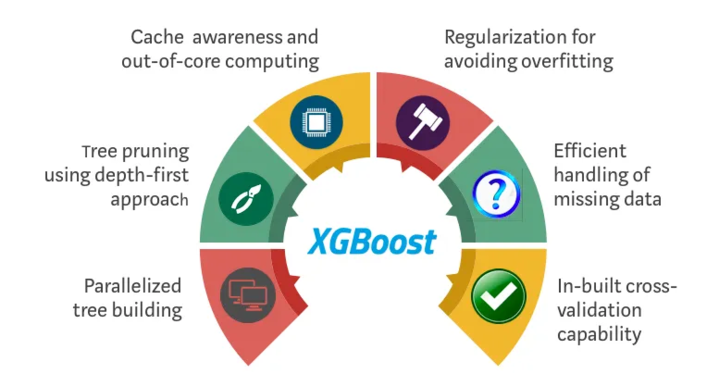

In [101]:
xgb = XGBClassifier(random_state= 42).fit(X_train, y_train)

In [102]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [103]:
eval_metric(xgb, X_train, y_train, X_test, y_test)

Test_Set
[[40  4]
 [ 3 53]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        44
           1       0.93      0.95      0.94        56

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100


Train_Set
[[456   0]
 [  0 444]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       456
           1       1.00      1.00      1.00       444

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



## <font color='limegreen'> <b>GridSearchCV</b><font color='black'>

**Main Hyperparameters**

* **max_depth:**
  - **Description:** Determines the maximum depth of each tree.
  - **Default:** 6
  - **Effect:** A higher value allows the model to learn more complex relationships, but increases the risk of overfitting. Lower values may improve generalization performance.

* **learning_rate (eta):**
  - **Description:** Scales the contribution of each weak learner (tree).
  - **Default:** 0.3
  - **Effect:** A low learning rate (e.g., 0.01) stabilizes the model but requires more iterations. A higher value learns faster but may increase the risk of overfitting.

* **n_estimators:**
  - **Description:** Total number of boosting iterations (number of trees) for the model.
  - **Default:** 100
  - **Effect:** More iterations usually lead to better results, but increases computation time and may lead to an overly complex model.

* **booster:**
  - **Description:** Chooses the boosting algorithm to use (gbtree, gblinear, dart).
  - **Default:** 'gbtree'
  - **Effect:** 'gbtree' is the most commonly used algorithm. 'gblinear' is for linear models. 'dart' uses dropout boosting.

---

**Tree Configuration**

* **min_child_weight:**
  - **Description:** Minimum total weight required to split a node.
  - **Default:** 1
  - **Effect:** A higher value leads to a simpler model and helps prevent overfitting.

* **gamma:**
  - **Description:** Minimum loss reduction required to split a node.
  - **Default:** 0
  - **Effect:** Higher values make the model simpler.

* **max_features (colsample_bytree):**
  - **Description:** The proportion of features to be randomly selected for each tree.
  - **Default:** 1.0
  - **Effect:** Lower values add randomness to the features, helping prevent overfitting.

* **subsample:**
  - **Description:** The proportion of samples to use in each iteration.
  - **Default:** 1.0
  - **Effect:** Lower values can reduce variance and help prevent overfitting.

---

**Regularization and Performance Optimization**

* **reg_alpha:**
  - **Description:** L1 regularization (lasso) term.
  - **Default:** 0
  - **Effect:** Higher values create simpler models.

* **reg_lambda:**
  - **Description:** L2 regularization (ridge) term.
  - **Default:** 1
  - **Effect:** Higher values help prevent overfitting.

* **scale_pos_weight:**
  - **Description:** Adjusts the weight of the positive class to correct class imbalance.
  - **Default:** 1
  - **Effect:** Can improve accuracy in imbalanced classification problems.

* **objective:**
  - **Description:** The objective function to use (binary:logistic, reg:squarederror).
  - **Default:** binary:logistic (for classification)
  - **Effect:** Defines the model's purpose.

---

**Early Stopping and Randomness Control**

* **early_stopping_rounds:**
  - **Description:** Stops training after a specified number of iterations if no improvement is seen.
  - **Default:** Not set (added manually).
  - **Effect:** Optimizes training time and prevents overfitting.

---

**Performance and GPU Support**

* **tree_method:**
  - **Description:** Chooses the decision tree configuration method (auto, exact, approx, hist, gpu_hist).
  - **Default:** 'auto'
  - **Effect:** 'gpu_hist' can be used for GPU acceleration, significantly reducing training time on large datasets.

---

### **Hyperparameter Summary Table**

| **Parameter**          | **Description**                                          | **Default**       |
|------------------------|----------------------------------------------------------|-------------------|
| **max_depth**          | Maximum depth of each tree                               | 6                 |
| **learning_rate**      | Learning rate                                            | 0.3               |
| **n_estimators**       | Number of boosting iterations (number of trees)          | 100               |
| **booster**            | Boosting algorithm choice                                | `'gbtree'`        |
| **min_child_weight**   | Minimum weight required to split a node                  | 1                 |
| **gamma**              | Minimum loss reduction required to split a node         | 0                 |
| **subsample**          | Subsampling ratio                                         | 1.0               |
| **colsample_bytree**   | Proportion of features to sample for each tree           | 1.0               |
| **reg_alpha**          | L1 regularization coefficient                            | 0                 |
| **reg_lambda**         | L2 regularization coefficient                            | 1                 |
| **scale_pos_weight**   | Positive class weight                                    | 1                 |
| **tree_method**        | Decision tree method                                      | `'auto'`          |
| **early_stopping_rounds** | Stops training if performance does not improve         | Not set           |

---

**XGBoost Tuning Tips**

1. **Tree Count and Learning Rate Balance:**
   - A lower learning rate with more trees typically provides better generalization performance.

2. **Subsample and Colsample:**
   - Using subsample (e.g., 0.8) and colsample (e.g., 0.8) can help reduce the model's variance.

3. **Max Depth and Min Child Weight:**
   - Smaller max_depth and higher min_child_weight values can help prevent overfitting.

4. **Grid Search forHyperparameter Optimization:**
   - Use GridSearchCV or RandomizedSearchCV to find the best hyperparameter combinations.


In [106]:
xgb_model = XGBClassifier(random_state=42)

In [107]:
# param_grid = {
#    "n_estimators": [50, 100, 200],
#    'max_depth': [3, 4, 5],
#    "learning_rate": [0.1, 0.2],
#    "subsample": [0.5, 0.8, 1],
#    "colsample_bytree": [0.5, 0.7, 1]
# }

# first created param_grid

In [108]:
param_grid = {
    "n_estimators": [80, 100, 150],
    'max_depth': [2, 3, 5],
    "learning_rate": [0.05, 0.1],
    "subsample": [0.5, 0.8, 1],
    "colsample_bytree": [0.5, 0.7, 1]
}

In [109]:
xgb_grid= GridSearchCV(xgb_model,
                       param_grid,
                       cv=5, 
                       scoring="f1", 
                       n_jobs=-1, 
                       verbose=2, 
                       return_train_score=True).fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


In [110]:
xgb_grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=80, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [111]:
xgb_grid.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 80,
 'subsample': 0.8}

---

**best_params_ values ​​with first param_grid**

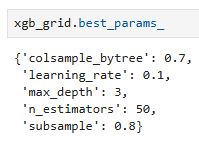

In [113]:
xgb_grid.best_score_

0.9682125077654098

## <font color='limegreen'> <b>Model Performance</b><font color='black'>

In [115]:
eval_metric(xgb_grid, X_train, y_train, X_test, y_test)

Test_Set
[[41  3]
 [ 3 53]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        44
           1       0.95      0.95      0.95        56

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100


Train_Set
[[453   3]
 [ 14 430]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       456
           1       0.99      0.97      0.98       444

    accuracy                           0.98       900
   macro avg       0.98      0.98      0.98       900
weighted avg       0.98      0.98      0.98       900



---

**results with first param_grid**

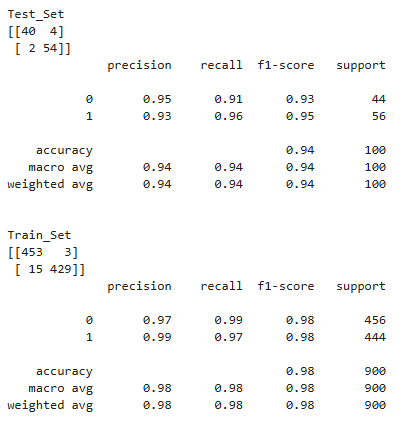

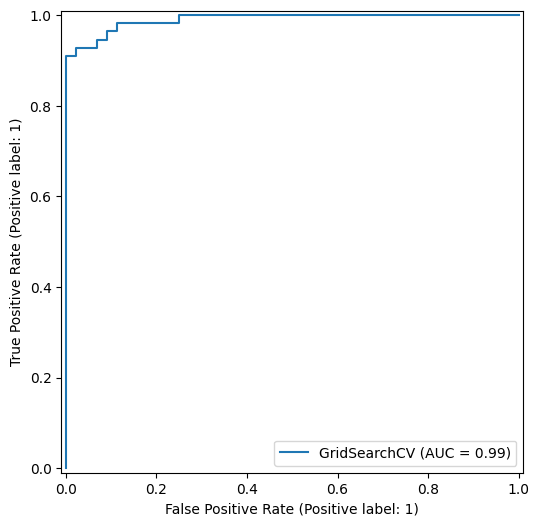

In [117]:
RocCurveDisplay.from_estimator(xgb_grid, X_test, y_test);

In [118]:
y_pred = xgb_grid.predict(X_test)

# process of assigning metrics to variables for comparison
xgb_f1 = f1_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_auc = roc_auc_score(y_test, y_pred)

## <font color='limegreen'> <b>Feature Importance</b><font color='black'>

In [120]:
model = XGBClassifier(n_estimators= 80, colsample_bytree = 0.5, subsample= 0.8, learning_rate = 0.1,
                      max_depth= 3, random_state = 42)

model.fit(X_train, y_train)

model.feature_importances_

feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['xgb_importance'])
xgb_imp_feats = feats.sort_values("xgb_importance", ascending= False)
xgb_imp_feats

,xgb_importance
Daily Time Spent on Site,0.380847
Daily Internet Usage,0.370787
Area Income,0.129642
Age,0.099587
Male,0.019137


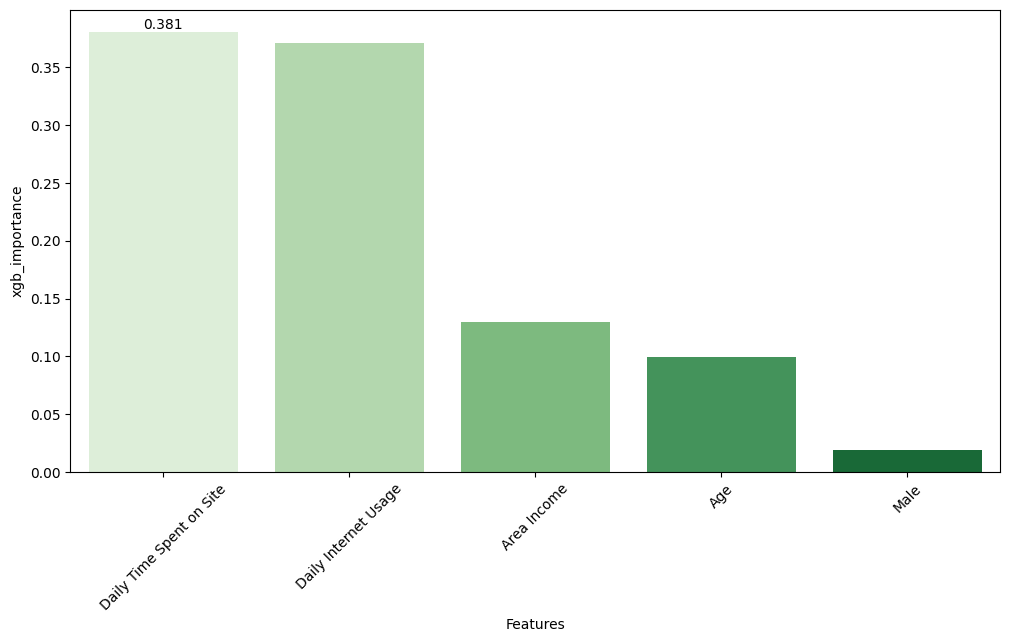

In [121]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=xgb_imp_feats, x=xgb_imp_feats.index, y='xgb_importance', palette='Greens')
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.xticks(rotation=45)
plt.xlabel("Features");

<p style="background-color:mediumseagreen;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:60px 20px;"><b>THANK YOU!</b></p>